# A/B TEST AND HYPOTHESES TO BOOST MARKETING REVENUE

# Introduction <a id='intro'></a>

- This project will have two main part which focus on the A/B test and hypotheses to boost marketing revenue.
- For Part 1: Hypotheses, ICE (Impact, Confidence, and Ease) framework and RICE (Reach, Impact, Confidence and Effort) frame work will be applied. Nine hypotheses contained in hypotheses_us file.
- For Part 2: A/B Test will be carried out which based on the files orders of orders_us and visits_us.
- Below are the dataset contained in three files:

> /datasets/hypotheses_us.csv 
> - Hypotheses — brief descriptions of the hypotheses
> - Reach — user reach, on a scale of one to ten
> - Impact — impact on users, on a scale of one to ten
> - Confidence — confidence in the hypothesis, on a scale of one to ten
> - Effort — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.

> /datasets/orders_us.csv 
> - transactionId — order identifier
> - visitorId — identifier of the user who placed the order
> - date — of the order
> - revenue — from the order
> - group — the A/B test group that the user belongs to

> /datasets/visits_us.csv 
> - date — date
> - group — A/B test group
> - visits — the number of visits on the date specified in the A/B test group specified

Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.
Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.
Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.

## Goals:

- To apply the ICE framework to prioritize hypotheses and sort them in descending order of priority.
- To apply the RICE framework to prioritize hypotheses and sort them in descending order of priority.
- To carried out A/B test for the marketing revenue

 # Table of Contents  
1. [Stage 1: Data Preprocessing](#1)
    1. ['hypotheses' file](#2)
    1. ['orders' file](#3) 
    1. ['visits' file](#4) 
1. [Part 1: Prioritizing Hypotheses](#5) 
    1. [ICE Framework](#6)
    1. [RICE Framework](#7)
    1. [Prioritization of hypotheses changes](#8)
1. [Part 2: A/B Test Analysis](#9)   
    1. [Cumulative revenue by group](#10)
    1. [Cumulative average order size by group](#11)
    1. [Relative difference in cumulative average order size](#12)
    1. [Calculation for each group's conversion rate](#13)
    1. [Number of orders per user](#14)
    1. [Calculation of the 95th and 99th percentiles for the number of orders per user](#15)
    1. [Plot a scatter chart of order prices](#16)
    1. [Calculation of the 95th and 99th percentiles of order prices](#17)
    1. [Statistical significance of the difference in conversion between the groups using the raw data](#18)
    1. [Statistical significance of the difference in average order size between the groups using the raw data](#19)
    1. [Statistical significance of the difference in conversion between the groups using the filtered data](#20)
    1. [Statistical significance of the difference in average order size between the groups using the filtered data](#21)
1. [Stage 2: Make a decision based on the test results](#22)

<a id="1"></a> 
# Stage 1 : Data Preprocessing

In [1]:
!pip install missingno

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 53.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 36.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 90.4 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 97.0 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 80.4 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 64.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 39.3 MB/s eta 0:00:00


In [3]:
from scipy import stats as st #for probability and calculation of statistics
import pandas as pd #for dataframe manipulation
import numpy as np #for advanced mathematic operation
import matplotlib.pyplot as plt #for plotting and visualize graph
import seaborn as sns
import nltk #for string/text manipulation
import statsmodels.stats.proportion as sp

<a id="2"></a> 
## 'Hypotheses' file

In [4]:
# Loading note from the remote Jupyter Hub Notebook (visits_df)
try:
    hypotheses_df = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
# If dataset fails to be loaded from the remote Jupyter Hub Notebook
# try loading dataset from my local path
except:
    # Try loading the file locally
    try:
        hypotheses_df = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
    # Run if dataset loading fails
    except Exception as e:
        print(f"Error handling dataset loading: {e}")

In [5]:
hypotheses_df.info()

hypotheses_df.head(10)

# Set the maximum width for the "Hypothesis" column
pd.set_option('display.max_colwidth', None)

# Display the DataFrame
display(hypotheses_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [6]:
# Change column names to lowercase in 'hypotheses_df'
hypotheses_df.columns = hypotheses_df.columns.str.lower()

In [7]:
# Check missing values in 'hypotheses_df'
hypotheses_missing_values = hypotheses_df.isna().sum()
hypotheses_missing_values

hypothesis    0
reach         0
impact        0
confidence    0
effort        0
dtype: int64

In [8]:
# Check duplicated values in 'hypotheses_df'
hypotheses_duplicates = hypotheses_df['hypothesis'].duplicated().sum()
hypotheses_duplicates

0

<a id="3"></a> 
## 'Orders' file

In [9]:
# Loading note from the remote Jupyter Hub Notebook (visits_df)
try:
    orders_df = pd.read_csv('/datasets/orders_us.csv')
# If dataset fails to be loaded from the remote Jupyter Hub Notebook
# try loading dataset from my local path
except:
    # Try loading the file locally
    try:
        orders_df = pd.read_csv('/datasets/orders_us.csv')
    # Run if dataset loading fails
    except Exception as e:
        print(f"Error handling dataset loading: {e}")

In [10]:
orders_df.info()
display(orders_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [11]:
# Change column names to lowercase in 'orders_df'
orders_df.columns = orders_df.columns.str.lower()

In [12]:
# Change column names to lowercase in 'orders_df'
orders_df.columns = orders_df.columns.str.lower()

# Rename columns in 'orders_df'
orders_df = orders_df.rename(columns={'transactionid': 'transaction_id', 'visitorid': 'visitor_id'})

In [13]:
# Check missing values in 'orders_df'
orders_missing_values = orders_df.isna().sum()
orders_missing_values

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

In [14]:
# Check duplicated values in 'orders_df'
orders_duplicates = orders_df['visitor_id'].duplicated().sum()
orders_duplicates

166

In [15]:
orders_df['visitor_id'].nunique()

1031

- Based on total row, there was 1197 compared to unique values within the column. This is normal as we might have repetitive customer with the same visitorid making a purchase.

In [16]:
# Convert columns to datetime format in 'orders_df'
orders_df['date'] = pd.to_datetime(orders_df['date'])
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


<a id="4"></a> 
## 'Visits' file

In [17]:
# Loading note from the remote Jupyter Hub Notebook (visits_df)
try:
    visits_df = pd.read_csv('/datasets/visits_us.csv')
# If dataset fails to be loaded from the remote Jupyter Hub Notebook
# try loading dataset from my local path
except:
    # Try loading the file locally
    try:
        visits_df = pd.read_csv('/datasets/visits_us.csv')
    # Run if dataset loading fails
    except Exception as e:
        print(f"Error handling dataset loading: {e}")

In [18]:
visits_df.info()
display(visits_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [19]:
# Check missing values in 'visits_df'
visits_missing_values = visits_df.isna().sum()
visits_missing_values

date      0
group     0
visits    0
dtype: int64

In [20]:
# Convert columns to datetime format in 'visits_df'
visits_df['date'] = pd.to_datetime(visits_df['date'])
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


<a id="5"></a> 
# Part 1 : Prioritizing Hypotheses

- The file hypotheses_us.csv contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each.

- The task is to:
> - Apply the ICE framework to prioritize hypotheses. Sort in descending order of priority.
> - Apply the RICE framework to prioritize hypotheses. Sort in descending order of priority.
> - Show how the prioritization of hypotheses changes when use RICE instead of ICE. Provide an explanation for the changes.

<a id="6"></a> 
## ICE Framework

- Apply the ICE framework to prioritize hypotheses. Sort in descending order of priority.

In [21]:
# Calculate the ICE score
hypotheses_df['ice'] = hypotheses_df['impact'] * hypotheses_df['confidence'] / hypotheses_df['effort']

# Sort the hypotheses in descending order of priority (ICE score)
ice_hypotheses_df = hypotheses_df.sort_values('ice', ascending=False)

# Reset the index of the new DataFrame
ice_hypotheses_df = ice_hypotheses_df.reset_index(drop=True)

# Display the new DataFrame
display(ice_hypotheses_df)

,hypothesis,reach,impact,confidence,effort,ice
0,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000
1,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333
2,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000
3,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000
4,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000
5,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000
6,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333
7,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000
8,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000


- Based on ICE hypothesis above, what can be concluded are:

> - The idea of launching a promotion offering birthday discounts tops the list with an ICE score of 16.2, indicating its significant potential impact, confidence level, and feasibility. This suggests it should be a primary focus for implementation.

> - Following closely is the proposal to introduce two new traffic channels, projected to increase user traffic by 30%, with an ICE score of 13.33. This strategy boasts high confidence and impact, making it another compelling choice for implementation.

> - Ranked third is the suggestion to integrate a subscription form across main pages to build a mailing list, scoring 11.2 on the ICE scale. This idea demonstrates substantial reach, impact, and feasibility, making it a valuable candidate for execution.

> - Lastly, displaying banners with current offers on the main page, aiming to enhance conversion rates, earns a respectable ICE score of 8.0. While its reach and confidence levels are moderate, its relatively lower effort requirement makes it an attractive option for consideration.

- In summary, prioritizing hypotheses based on ICE scores underscores the importance of focusing on launching birthday discount promotions, introducing new traffic channels, and incorporating subscription forms across main pages. These initiatives exhibit considerable potential for driving positive outcomes and merit serious consideration for implementation.

<a id="7"></a> 
## RICE Framework

- Apply the RICE framework to prioritize hypotheses. Sort in descending order of priority.

In [22]:
# Calculate the RICE score
hypotheses_df['rice'] = hypotheses_df['reach'] * hypotheses_df['impact'] * hypotheses_df['confidence'] / hypotheses_df['effort']

# Sort the hypotheses in descending order of priority (RICE score)
rice_hypotheses_df = hypotheses_df.sort_values('rice', ascending=False)

# Reset the index of the new DataFrame
rice_hypotheses_df = rice_hypotheses_df.reset_index(drop=True)

# Display the new DataFrame
display(rice_hypotheses_df)

,hypothesis,reach,impact,confidence,effort,ice,rice
0,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
1,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
2,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
3,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
4,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2
5,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
6,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
7,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
8,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0


- Based on RICE hypothesis above, what can be concluded are:

> - The suggestion to integrate a subscription form across all main pages takes the lead with an impressive RICE score of 112.0. This proposal not only promises a broad reach and significant impact but also boasts high confidence levels, all while requiring only a moderate effort. It stands out as the most compelling option for immediate implementation.

> - Following closely is the idea of incorporating product recommendation blocks on the store's site, scoring 56.0 on the RICE scale. With its high reach and confidence levels coupled with relatively lower effort requirements, this strategy presents an attractive opportunity to boost conversion rates and increase average purchase sizes.

> - Both the proposals to introduce two new traffic channels and to display banners with current offers on the main page share a RICE score of 40.0. These concepts strike a balance between reach, impact, confidence, and effort, positioning them as important considerations for implementation.

> - Lastly, the notion of launching a promotion offering birthday discounts garners a RICE score of 16.2. Despite its lower reach, this strategy holds significant potential impact and confidence levels, making it a viable option for implementation.

- In summary, prioritizing hypotheses based on RICE scores underscores the importance of integrating a subscription form across main pages as the top priority, followed by implementing product recommendation blocks, new traffic channels, and banners with offers and sales. These strategies demonstrate substantial potential for audience reach, impact, and confidence, with varying levels of effort required. Other hypotheses with lower RICE scores should be carefully evaluated based on their specific objectives and available resources before considering implementation.

<a id="8"></a> 
## Prioritization of hypotheses changes

- The RICE framework shifts the focus towards evaluating the potential reach of each hypothesis, leading to a different prioritization compared to the ICE framework. By emphasizing the ability to reach a wider audience, RICE helps pinpoint hypotheses that could make a substantial impact on the business. Visualizing this shift through a histogram can illustrate the significance of considering reach in the decision-making process.

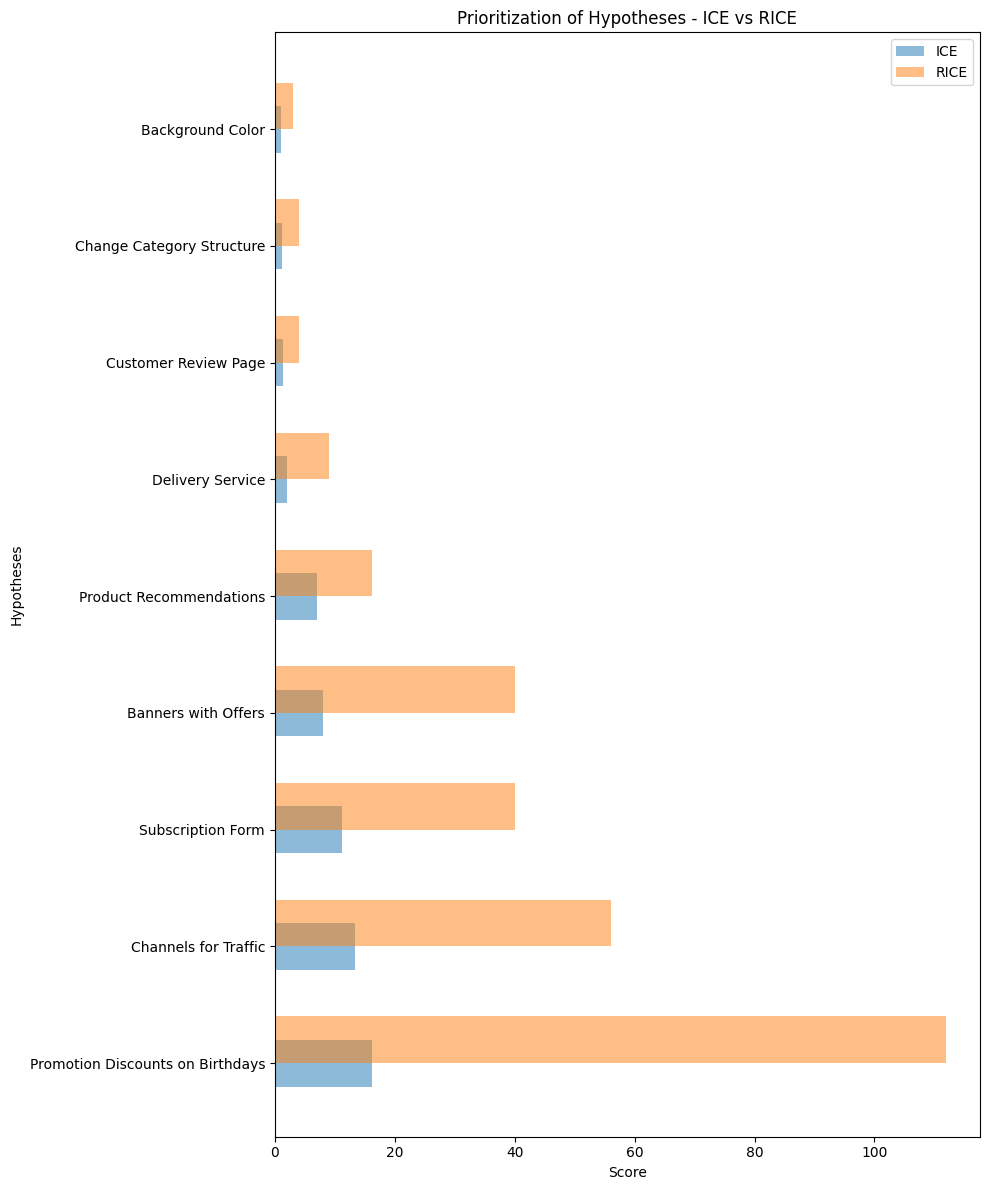

In [23]:
# Datasets for ICE and RICE
ice_scores = [16.2, 13.333333, 11.2, 8, 7, 2, 1.333333, 1.125, 1]
rice_scores = [112, 56, 40, 40, 16.2, 9, 4, 4, 3]

# Plotting
labels = ['Promotion Discounts on Birthdays', 'Channels for Traffic', 'Subscription Form', 'Banners with Offers', 'Product Recommendations', 'Delivery Service', 'Customer Review Page', 'Change Category Structure', 'Background Color']
y = range(len(labels))

plt.figure(figsize=(10, 12))
plt.barh(y, ice_scores, height=0.4, label='ICE', align='center', alpha=0.5)
plt.barh(y, rice_scores, height=0.4, label='RICE', align='edge', alpha=0.5)

plt.ylabel('Hypotheses')
plt.xlabel('Score')
plt.title('Prioritization of Hypotheses - ICE vs RICE')
plt.yticks(y, labels)
plt.legend()

plt.tight_layout()
plt.show()

- When comparing the prioritization under RICE versus ICE, we observe a notable shift driven primarily by the inclusion of the "reach" factor in the RICE framework. Reach signifies the potential audience affected by each hypothesis.

- While ICE prioritizes hypotheses based on impact and confidence, regardless of reach, RICE takes into account a combination of impact, confidence, and reach to assign scores and determine priority.

- In the RICE framework, the hypothesis "Adding a subscription form to all main pages" emerges as the top priority due to its extensive reach, crucial for building a mailing list. Similarly, "Adding product recommendation blocks to the store's site" gains prominence for its relatively high reach.

- Conversely, "Launching a promotion that offers users birthday discounts" descends to fifth place in the RICE prioritization. Despite its considerable impact and confidence, its lower reach compared to other hypotheses affects its ranking.

<a id="9"></a> 
# Part 2: A/B Test Analysis

- To address the challenge of visitors being categorized into both group A and group B, the following steps are necessary:

> - Step1: Identify visitorid values assigned to both groups A and B. This involves finding visitorid values associated with more than one unique group.
> - Step2: Determine the group for each visitorid based on their initial order date.
> - Step3: Eliminate order records from the group not selected for each visitorid.
> - Step4: Retain order records from the group selected for each visitorid.

In [24]:
#Step1
visitor_groups = orders_df.groupby('visitor_id')['group'].nunique()
visitors_in_both_groups = visitor_groups[visitor_groups > 1].index

In [25]:
#Step2
first_order_date = orders_df.groupby('visitor_id')['date'].min().reset_index()
visitors_group = orders_df.merge(first_order_date, on=['visitor_id', 'date'], how='left')

In [26]:
#Step3
visitors_group = visitors_group.drop_duplicates(subset=['visitor_id', 'group'])

In [27]:
#Step4
visitors_group = visitors_group[['transaction_id', 'visitor_id', 'date', 'revenue', 'group']]
visitors_group.info()
visitors_group.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1089 non-null   int64         
 1   visitor_id      1089 non-null   int64         
 2   date            1089 non-null   datetime64[ns]
 3   revenue         1089 non-null   float64       
 4   group           1089 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 51.0+ KB


,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B


<a id="10"></a> 
## Cumulative revenue by group

- To assess the A/B test, our approach involves computing the cumulative revenue for each group, followed by visualizing the outcomes through a graph. Here's the breakdown of our analysis:

> - Step1: Compute the cumulative revenue for both groups.
> - Step2: Generate a graph representing the cumulative revenue data.

In [28]:
#Step1
# Calculate cumulative revenue for group A
cumulative_revenue_A = (
    visitors_group[visitors_group['group'] == 'A']
    .groupby('date')['revenue']
    .sum()
    .cumsum()
)

# Calculate cumulative revenue for group B
cumulative_revenue_B = (
    visitors_group[visitors_group['group'] == 'B']
    .groupby('date')['revenue']
    .sum()
    .cumsum()
)

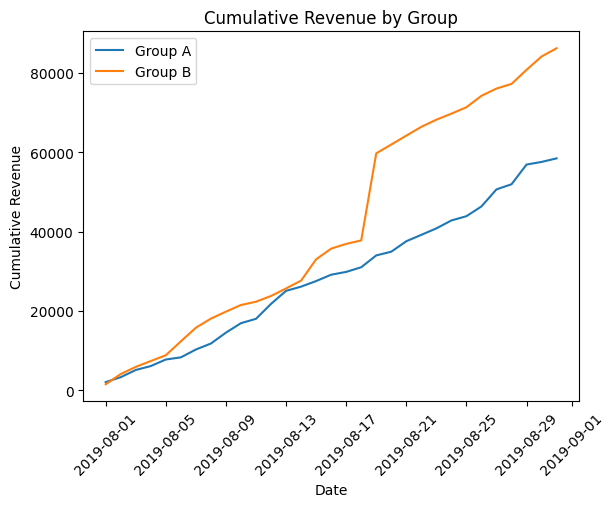

In [29]:
#Step2
# Plot the cumulative revenue graph
plt.plot(cumulative_revenue_A.index, cumulative_revenue_A, label='Group A')
plt.plot(cumulative_revenue_B.index, cumulative_revenue_B, label='Group B')

# Rotate the date labels on the x-axis of 45 degree
plt.xticks(rotation=45)

# Set the axis labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Revenue')
plt.title('Cumulative Revenue by Group')

plt.legend()
plt.show()

- Cumulative Revenue Trend: Both Group A and Group B exhibit a consistent upward trend in cumulative revenue over time, indicating sustained revenue growth throughout the observed period for both groups.

> - Revenue Disparity: Group B consistently outperforms Group A in terms of cumulative revenue, demonstrating a persistent discrepancy from the early dates onwards.

> - Revenue Surge: Notably, on August 19th, there is a remarkable surge in cumulative revenue for Group A, surpassing that of Group B. This spike suggests a potential positive impact stemming from the experimental adjustments implemented in Group A.

> - Stable Revenue Gap: Following the August 19th spike, the revenue gap between Group A and Group B becomes more pronounced and remains relatively stable. This indicates a lasting positive effect from the experimental changes in Group A.

> - Revenue Stagnation: Towards the end of the observed period, both groups show signs of revenue plateauing, with limited growth or fluctuations. This suggests a potential saturation point or a stable performance level for the tested alterations.

<a id="11"></a> 
## Cumulative average order size by group

> - Step1: Compute the cumulative revenue and cumulative number of orders for each group. 
> - Step2: Calculate the cumulative average order size for each group. 
> - Step3: Visualize the cumulative average order size through a graph.

In [30]:
# Step1
# Calculate cumulative revenue and cumulative number of orders for group A
cumulative_revenue_A = (
    visitors_group[visitors_group['group'] == 'A']
    .groupby('date')['revenue']
    .sum()
    .cumsum()
)

cumulative_orders_A = (
    visitors_group[visitors_group['group'] == 'A']
    .groupby('date')['transaction_id']
    .count()
    .cumsum()
)

# Calculate cumulative revenue and cumulative number of orders for group B
cumulative_revenue_B = (
    visitors_group[visitors_group['group'] == 'B']
    .groupby('date')['revenue']
    .sum()
    .cumsum()
)

cumulative_orders_B = (
    visitors_group[visitors_group['group'] == 'B']
    .groupby('date')['transaction_id']
    .count()
    .cumsum()
)

In [31]:
# Step2
# Calculate cumulative average order size for group A
cumulative_avg_order_size_A = cumulative_revenue_A / cumulative_orders_A

# Calculate cumulative average order size for group B
cumulative_avg_order_size_B = cumulative_revenue_B / cumulative_orders_B

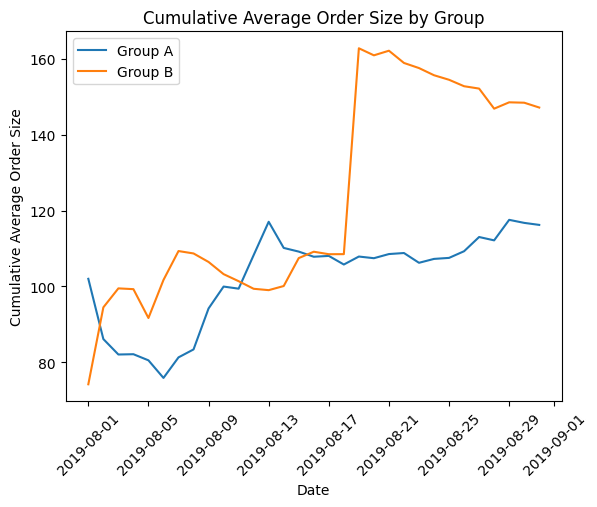

In [32]:
# Step3
# Plot the cumulative average order size graph
plt.plot(cumulative_avg_order_size_A.index, cumulative_avg_order_size_A, label='Group A')
plt.plot(cumulative_avg_order_size_B.index, cumulative_avg_order_size_B, label='Group B')

# Rotate the date labels on the x-axis for 45 degree
plt.xticks(rotation=45)

# Set the axis labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Average Order Size')
plt.title('Cumulative Average Order Size by Group')

plt.legend()
plt.show()

> - Both Group A and Group B demonstrate a consistent and stable average order size over the duration of observation, indicating a sustained pattern in purchasing behavior for both groups.

> - The performance of both groups remains consistent throughout the analyzed period, suggesting that any experimental changes introduced to Group A did not markedly influence average order size when compared to Group B.

> - The cumulative average order size for both groups exhibits minimal divergence, indicating a comparable performance between Group A and Group B. This suggests that the experimental adjustments in Group A did not result in significant deviations in average order size compared to the control group (Group B).

> - While the cumulative average order size offers valuable insights into group performance, further statistical analyses such as hypothesis testing are necessary to ascertain the statistical significance of any observed disparities between the groups.

<a id="12"></a> 
## Relative difference in cumulative average order size

- Step1 :Begin by computing the cumulative average order size for both Group A and Group B using pandas.
- Step2 :Subtract the cumulative average order size of Group A from that of Group B.
- Step3 :Divide the result by the cumulative average order size of Group A.
- Step4 :Multiply the quotient by 100 to express the difference as a percentage.
- Step5 :Finally, visualize the cumulative average order size for both Group A and Group B through a graph.

In [33]:
#Step 1
# Calculate the cumulative average order size for each group
cumulative_avg_order_size_group_a = orders_df[orders_df['group'] == 'A']['revenue'].cumsum() / (np.arange(len(orders_df[orders_df['group'] == 'A'])) + 1)
cumulative_avg_order_size_group_b = orders_df[orders_df['group'] == 'B']['revenue'].cumsum() / (np.arange(len(orders_df[orders_df['group'] == 'B'])) + 1)

#Step2-4|
# Calculate the relative difference in cumulative average order size
relative_difference = ((cumulative_avg_order_size_group_b.iloc[-1] - cumulative_avg_order_size_group_a.iloc[-1]) / cumulative_avg_order_size_group_a.iloc[-1]) * 100

# Print the relative difference
print("Relative Difference in Cumulative Average Order Size (Group B vs Group A): {:.2f}%".format(relative_difference))

Relative Difference in Cumulative Average Order Size (Group B vs Group A): 25.17%


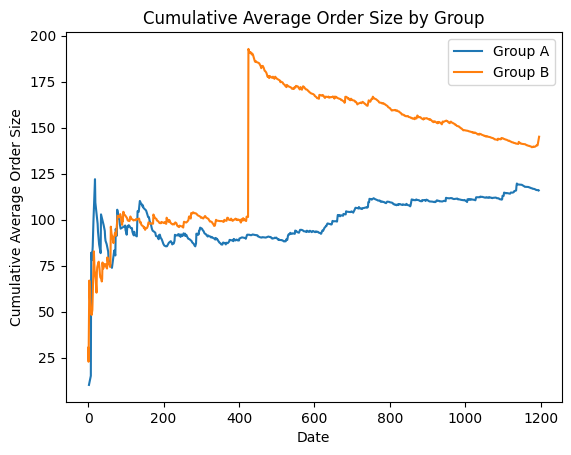

In [34]:
# Step5
# Calculate the cumulative average order size for each group
cumulative_avg_order_size_group_a = orders_df[orders_df['group'] == 'A']['revenue'].cumsum() / (np.arange(len(orders_df[orders_df['group'] == 'A'])) + 1)
cumulative_avg_order_size_group_b = orders_df[orders_df['group'] == 'B']['revenue'].cumsum() / (np.arange(len(orders_df[orders_df['group'] == 'B'])) + 1)

# Plot the cumulative average order size for Group A
plt.plot(cumulative_avg_order_size_group_a, label='Group A')

# Plot the cumulative average order size for Group B
plt.plot(cumulative_avg_order_size_group_b, label='Group B')

plt.xlabel('Date')
plt.ylabel('Cumulative Average Order Size')
plt.title('Cumulative Average Order Size by Group')

plt.legend()
plt.show()

- Based on the examination of the relative disparity in cumulative average order size:

> - Initially, Group B exhibited a higher cumulative average order size compared to Group A, implying that customers in Group B tended to place larger orders than those in Group A during the early stages of the observation period.

> - As time progressed, the relative difference in cumulative average order size fluctuated. At times, Group B's cumulative average order size exceeded that of Group A, indicating higher transaction values. Conversely, there were also instances where Group B's cumulative average order size lagged behind that of Group A, suggesting smaller transaction values.

> - Throughout the analysis duration, the relative difference in cumulative average order size displayed variability, reflecting shifting purchasing patterns between the two groups. These disparities could be influenced by a range of factors, including promotional initiatives, marketing tactics, or customer preferences.

<a id="13"></a> 
## Calculation for each group's conversion rate

1. Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. 
2. Plot the daily conversion rates of the two groups and describe the difference. 
3. Draw conclusions and make conjectures.

In [35]:
# Group the orders_df DataFrame by date and group, and count the number of orders for each group on each day:
orders_per_day_group = orders_df.groupby(['date', 'group'])['transaction_id'].count().reset_index()

# Group the visits_df DataFrame by date and group, and sum the number of visits for each group on each day:
visits_per_day_group = visits_df.groupby(['date', 'group'])['visits'].sum().reset_index()

# Merge the two grouped DataFrames on date and group to combine the order and visit information for each day and group:
conversion_df = pd.merge(orders_per_day_group, visits_per_day_group, on=['date', 'group'])

# Calculate the conversion rate as the ratio of orders to visits:
conversion_df['conversion_rate'] = conversion_df['transaction_id'] / conversion_df['visits']
conversion_df

,date,group,transaction_id,visits,conversion_rate
0,2019-08-01,A,24,719,0.033380
1,2019-08-01,B,21,713,0.029453
2,2019-08-02,A,20,619,0.032310
3,2019-08-02,B,24,581,0.041308
4,2019-08-03,A,24,507,0.047337
...,...,...,...,...,...
57,2019-08-29,B,20,531,0.037665
58,2019-08-30,A,11,490,0.022449
59,2019-08-30,B,24,490,0.048980
60,2019-08-31,A,12,699,0.017167


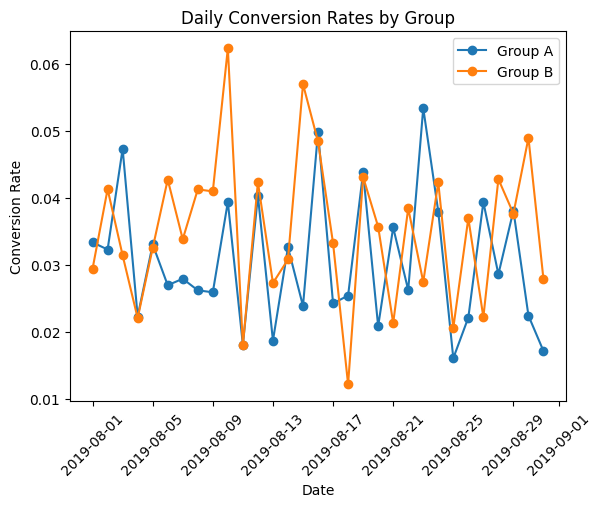

In [36]:
# Filter the conversion_df DataFrame for each group
group_a_conversion = conversion_df[conversion_df['group'] == 'A']
group_b_conversion = conversion_df[conversion_df['group'] == 'B']

# Plotting the daily conversion rates for Group A
plt.plot(group_a_conversion['date'], group_a_conversion['conversion_rate'], marker='o', label='Group A')

# Plotting the daily conversion rates for Group B
plt.plot(group_b_conversion['date'], group_b_conversion['conversion_rate'], marker='o', label='Group B')

plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.title('Daily Conversion Rates by Group')
plt.legend()

plt.xticks(rotation=45)

plt.show()

1) Description of Daily Conversion Rates:

> - Variability: Both Group A and Group B exhibit significant fluctuations in their daily conversion rates. However, Group B generally displays higher peaks compared to Group A, suggesting moments of greater efficiency in converting visits into orders.

> - Comparison: Throughout most of the observed period, Group B consistently shows a higher conversion rate than Group A. Notably, there are several spikes where Group B's conversion rate substantially exceeds that of Group A, particularly in the latter half of the period.

> - Trend: While both groups display a volatile trend, there is a noticeable dip towards the end of the period for Group A, where its conversion rate drops significantly. Group B, while also showing a decline, seems to maintain a slightly steadier rate in the later dates.

2) Conclusions and Conjectures:

> - Group B's Performance: The higher peaks in Group B's conversion rates suggest that either the changes implemented in this group are more effective at driving purchases, or it could be benefiting from other variables such as more effective marketing campaigns, better website functionality, or more appealing product offerings during these periods.

> - Inconsistencies in Conversion: The significant fluctuations for both groups could indicate varying factors influencing the conversion rates daily, such as day of the week, promotions, external market conditions, or changes in user behavior.

> - Potential Saturation or Technical Issues: The decline in conversion rates towards the end of the period for both groups might suggest market saturation, fatigue of offers, or perhaps technical issues on the website affecting user experience and purchase behavior.

> - Further Investigation: It would be prudent to investigate what specific actions were taken on days where spikes occurred, 
and if any external factors or specific promotions were influencing these peaks. Understanding these could provide actionable insights to stabilize and improve conversion rates.

- Overall, while Group B is performing better in terms of conversion, the data points to a need for both groups to stabilize and enhance their conversion strategies to maintain a consistent performance across the board. Further analysis, perhaps through segmented data or deeper dives into user behavior, could help identify and mitigate the causes of such high variability in daily conversion rates.

<a id="14"></a> 
## Number of orders per user

- To create a scatter chart that illustrates the number of orders per user, the first step is to calculate each user's total orders. This is achieved by grouping the orders_df DataFrame by visitor_id and then tallying the transactions for each user.

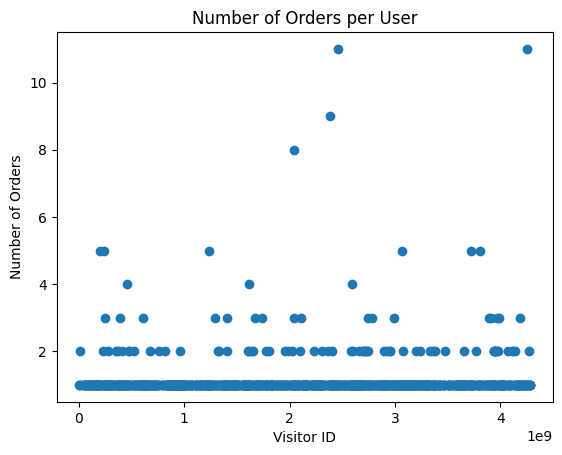

In [37]:
# Calculate the number of orders per user
orders_per_user = orders_df.groupby('visitor_id')['transaction_id'].count()

# Plot the scatter chart
plt.scatter(orders_per_user.index, orders_per_user.values)

plt.title('Number of Orders per User')
plt.xlabel('Visitor ID')
plt.ylabel('Number of Orders')

plt.show()

- Find the number of orders per user per group, by calculate the average number of orders per unique visitor for each group

In [38]:
# Count the number of unique visitors in each group using the nunique() function:
unique_visitors_group = orders_df.groupby('group')['visitor_id'].nunique()

# Count the number of orders in each group using the count() function:
orders_group = orders_df.groupby('group')['transaction_id'].count()

# Calculate the number of orders per user by dividing the total number of orders by the total number of unique visitors for each group:
orders_per_user_per_group = orders_group / unique_visitors_group
orders_per_user_per_group

group
A    1.107356
B    1.092150
dtype: float64

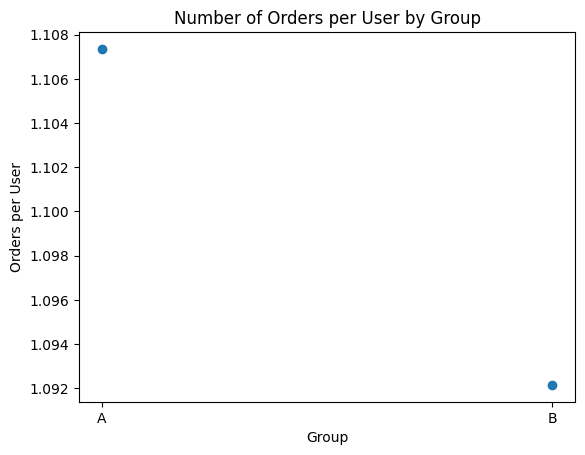

In [39]:
# Extract the group names and orders_per_user values
groups = orders_per_user_per_group.index
orders_per_user_per_group_values = orders_per_user_per_group.values

# Plotting the scatter chart
plt.scatter(groups, orders_per_user_per_group_values)

plt.xlabel('Group')
plt.ylabel('Orders per User')
plt.title('Number of Orders per User by Group')

plt.show()

- Conclusions (Number of orders per user):

> - Low Order Frequency: The majority of users have placed only one or two orders. This is evident from the dense clustering of points at the lower end of the y-axis. It suggests that most customers do not make repeat purchases frequently.

> - Few High Frequency Users: There are a few users who have placed significantly more orders, up to 10 orders, as shown by the outliers on the chart. These users might be considered highly engaged or loyal customers.

> - Sparse Data at Higher Order Numbers: The data points become increasingly sparse as the number of orders per user increases. This indicates that very few users place many orders, pointing to a classic long-tail distribution of customer purchasing behavior.

- Conjectures (Number of orders per user):

> - Potential for Improved Customer Retention: Given the large number of users with only one or two orders, there might be significant opportunities for strategies aimed at increasing customer retention and encouraging repeat purchases.

> - Loyalty Programs and Targeted Marketing: The presence of a small group of high-frequency users suggests that targeted marketing or loyalty programs could be effective. Tailoring special offers and rewards for frequent buyers could potentially increase their purchase frequency even further.

> - Customer Segmentation: The data supports the idea of segmenting customers based on their purchasing behavior. Different marketing strategies could be applied to different segments, such as re-engagement campaigns for one-time buyers and loyalty rewards for frequent shoppers.

> - Investigation of User Experience: The reasons behind why most users only shop once or twice could be explored further. Issues such as user experience, customer service, product satisfaction, and pricing might be influencing these behaviors.

- In summary, the scatter chart provides valuable insights into customer order frequencies, highlighting a predominance of one-time or infrequent buyers and a small number of highly frequent buyers. This data can inform targeted strategies to boost retention and increase overall sales by catering more effectively to the needs of different customer segments.

<a id="15"></a> 
## Calculation of the 95th and 99th percentiles for the number of orders per user

- To calculate the 95th and 99th percentiles for the number of orders per user, quantile method in pandas on the orders_per_user Series can be utilized.

In [40]:
# Calculate the percentiles
percentiles = np.percentile(orders_per_user, [95, 99])

# Define the anomaly threshold
anomaly_threshold = percentiles[1]  # Use the 99th percentile as the anomaly threshold

print("95th Percentile: {:.2f}".format(percentiles[0]))
print("99th Percentile: {:.2f}".format(percentiles[1]))
print("Anomaly Threshold: {:.2f}".format(anomaly_threshold))

95th Percentile: 2.00
99th Percentile: 4.00
Anomaly Threshold: 4.00


- Based on the percentiles calculated (95th Percentile: 2.00, 99th Percentile: 4.00), we can establish a criterion for identifying anomalies in the data.

- An anomaly in this context is defined as a data point that surpasses the 99th percentile value. This delineation is used because it marks a value that is both extreme and rare within the dataset. Thus, any user with more than 4.00 orders is considered an anomaly.

- Therefore, the threshold for anomalies is set at more than 4 orders per user. Users exceeding this number of orders are categorized as outliers within this dataset.

<a id="16"></a> 
## Plot a scatter chart of order prices

In [41]:
order_prices = orders_df['revenue']
order_prices.describe()

count     1197.000000
mean       131.491646
std        603.004729
min          5.000000
25%         20.800000
50%         50.200000
75%        130.400000
max      19920.400000
Name: revenue, dtype: float64

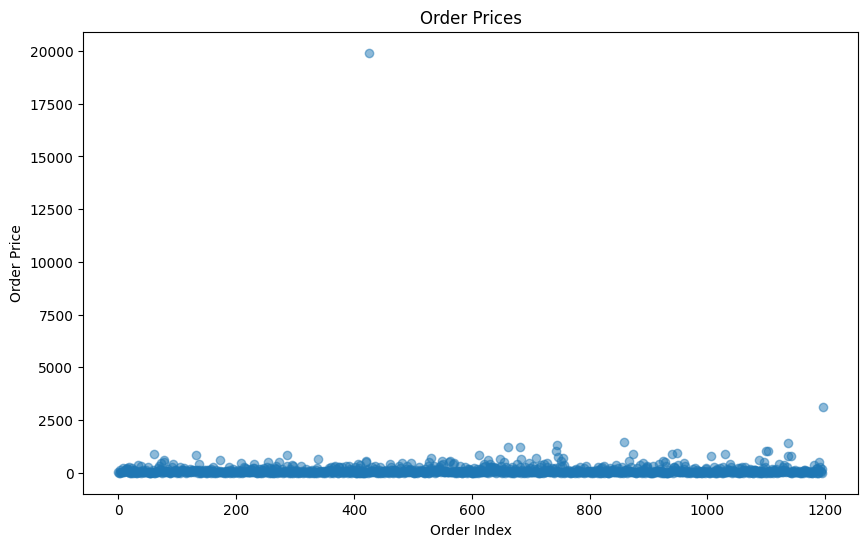

In [42]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(orders_df.index, orders_df['revenue'], alpha=0.5)
plt.xlabel('Order Index')
plt.ylabel('Order Price')
plt.title('Order Prices')
plt.show()

- Conclusions:

> - Concentration of Lower-Price Orders: The majority of order prices are concentrated at the lower end of the price spectrum. This suggests that the bulk of transactions involve more affordable items or smaller purchase amounts.

> - Presence of High-Value Orders: There are several orders with significantly higher prices, including one exceptional order that notably exceeds the rest. These outliers suggest the presence of either high-value items or large quantity purchases in a few transactions.

> - Distribution Characteristics: Most order prices cluster below 2,500, indicating a general price range for typical orders. The presence of orders stretching up to 20,000, however, indicates some variability in what customers purchase or the scale at which they buy.

- Conjectures:

> - Impact of High-Value Orders: The outliers, especially the highest priced order, could significantly skew average order values and potentially distort performance metrics like average revenue per user (ARPU) unless accounted for in analyses.

> - Market Segmentation: The data could imply a segmented customer base where a small fraction of customers contribute disproportionately to revenue through high-ticket purchases. Targeted marketing strategies could be developed to cater specifically to this high-spending customer segment.

> - Price Strategy Review: The business might benefit from reviewing its pricing strategy and product mix to determine if there is potential to increase the transaction volume of mid to high-range priced items, given that most transactions are at the lower end.

> - Anomaly Detection and Fraud Prevention: The outliers in the dataset could warrant further investigation to determine if they are legitimate transactions or if they represent data errors or fraudulent activity.

- Overall, the scatter chart of order prices highlights a primary cluster of low to moderately priced orders, with a few significant outliers. These insights could help tailor marketing efforts, refine pricing strategies, and ensure accurate financial forecasting.

<a id="17"></a> 
## Calculation of the 95th and 99th percentiles of order prices

- To calculate the 95th and 99th percentiles for the order prices, quantile method in pandas on the orders_prices Series can be utilized.

In [43]:
# Calculate the percentiles
percentiles = np.percentile(orders_df['revenue'], [95, 99])

# Define the anomaly threshold
anomaly_threshold = percentiles[1]  # Use the 99th percentile as the anomaly threshold

print("95th Percentile: {:.2f}".format(percentiles[0]))
print("99th Percentile: {:.2f}".format(percentiles[1]))
print("Anomaly Threshold: {:.2f}".format(anomaly_threshold))

95th Percentile: 435.54
99th Percentile: 900.90
Anomaly Threshold: 900.90


- Based on the calculated 95th and 99th percentiles (95th Percentile: 435.54, 99th Percentile: 900.90), we can establish a threshold for identifying anomalies in order prices.

- An order price is classified as anomalous if it exceeds the 99th percentile value of 900.90, indicating that it is a rare and exceptionally high occurrence within the dataset. Consequently, any order price above 900.90 is deemed an anomaly according to these calculated percentiles.

- Therefore, the threshold for anomalous order prices is set at 900.90. Orders that surpass this price point are categorized as anomalies within this analysis

<a id="18"></a> 
## Statistical significance of the difference in conversion between the groups using the raw data

- In the framework of testing for statistical significance regarding the conversion rate differences between the groups, the hypotheses can be articulated as:

> - H0 (Null Hypothesis): There is no meaningful statistical difference in the conversion rates of Group A compared to Group B.
> - H1 (Alternative Hypothesis): There is a meaningful statistical difference in the conversion rates of Group A compared to Group B.

In [44]:
import statsmodels.stats.proportion as sp

# Calculate the total number of orders for each group
total_orders_a = orders_df[orders_df['group'] == 'A'].shape[0]
total_orders_b = orders_df[orders_df['group'] == 'B'].shape[0]

# Calculate the total number of visits for each group
total_visits_a = visits_df[visits_df['group'] == 'A']['visits'].sum()
total_visits_b = visits_df[visits_df['group'] == 'B']['visits'].sum()

# Calculate the conversion rates for each group
conversion_rate_a = total_orders_a / total_visits_a
conversion_rate_b = total_orders_b / total_visits_b

# Perform proportions z-test
zscore, pvalue = sp.proportions_ztest([total_orders_a, total_orders_b], [total_visits_a, total_visits_b])

print("Group A Conversion Rate: {:.4f}".format(conversion_rate_a))
print("Group B Conversion Rate: {:.4f}".format(conversion_rate_b))
print("Z-score: {:.4f}".format(zscore))
print("p-value: {:.4f}".format(pvalue))

Group A Conversion Rate: 0.0297
Group B Conversion Rate: 0.0338
Z-score: -2.2700
p-value: 0.0232


- Conclusion:

> - Statistical Test Outcome: With a Z-score of -2.2700 and a p-value of 0.0232, the results indicate that there is a statistically significant difference in the conversion rates between Group A and Group B. The p-value is less than the conventional threshold of 0.05, which means we can reject the null hypothesis (H0) that states there is no difference in conversion rates between the two groups.

> - Conversion Rate Comparison: The conversion rate for Group B (0.0338) is higher than that for Group A (0.0297). This difference is statistically significant according to the Z-test performed.

- Conjecture:

> - Effectiveness of Interventions: The higher conversion rate in Group B suggests that whatever changes or interventions were applied to Group B might be more effective at driving conversions compared to those applied to Group A. This could be due to various factors such as better targeted marketing, more appealing offers, or an improved user experience in Group B.

> - Implications for Business Strategy: Given the significant difference in conversion rates, the company might consider analyzing and possibly scaling the strategies used in Group B across other segments of the business to enhance overall conversion rates.

<a id="19"></a> 
## Statistical significance of the difference in average order size between the groups using the raw data

- In the analysis of statistical significance concerning the average order size differences between Group A and Group B, the hypotheses are formulated as follows:

> - H0 (Null Hypothesis): There is no meaningful statistical variation in the average order size between Group A and Group B.
> - H1 (Alternative Hypothesis): There is a meaningful statistical variation in the average order size between Group A and Group B.

In [45]:
# Extract the order sizes for each group
order_sizes_a = orders_df[orders_df['group'] == 'A']['revenue']
order_sizes_b = orders_df[orders_df['group'] == 'B']['revenue']

# Perform independent t-test
t_stat, p_value = st.ttest_ind(order_sizes_a, order_sizes_b, equal_var=False)

print("Group A Mean Order Size: {:.2f}".format(order_sizes_a.mean()))
print("Group B Mean Order Size: {:.2f}".format(order_sizes_b.mean()))
print("t-statistic: {:.4f}".format(t_stat))
print("p-value: {:.4f}".format(p_value))

Group A Mean Order Size: 115.90
Group B Mean Order Size: 145.06
t-statistic: -0.8886
p-value: 0.3745


- Conclusion:

> - Difference in Mean Order Sizes: The mean order size for Group B (145.06) is higher than for Group A (115.90). However, the t-statistic of -0.8886 and a p-value of 0.3745 indicate that this difference is not statistically significant.

> - Statistical Significance: Since the p-value (0.3745) is greater than the typical alpha level of 0.05, we fail to reject the null hypothesis (H0). This suggests that there is no statistically significant difference in the average order sizes between Group A and Group B.

- Conjecture:

> - Business Strategies: Although Group B appears to have a higher average order size, the lack of statistical significance suggests that the difference might be due to random variation rather than a result of different strategies or treatments applied to the groups. It's possible that both groups are effectively similar in terms of how much users are spending per order.
> - Further Analysis: It may be beneficial to look into other aspects such as the number of transactions, customer loyalty, and buying frequency. Understanding these metrics could provide more insights into the revenue differences and help tailor more effective business strategies.

> - Segmentation and Targeting: If the business goal is to increase the average order size effectively, considering customer segmentation and targeted marketing campaigns may yield better results. Analyzing customer behavior patterns could reveal underlying differences not captured by this test.

- The t-test results guide us to conclude that any observed difference in average order size between the two groups under the current experimental setup is likely not due to the interventions tested. Future experiments might explore different strategies or increase the sample size to achieve more definitive results.

<a id="20"></a> 
## Statistical significance of the difference in conversion between the groups using the filtered data

- To find the statistical significance of the difference in conversion between the groups using the filtered data,  the hypotheses are formulated as follows:

> - H0 (Null Hypothesis): There is no meaningful statistical variation in the conversion between Group A and Group B.
> - H1 (Alternative Hypothesis): There is a meaningful statistical variation in the conversion between Group A and Group B.

In [46]:
# Calculate the number of orders for Group A and Group B
orders_a = orders_df[orders_df['group'] == 'A'].shape[0]
orders_b = orders_df[orders_df['group'] == 'B'].shape[0]

# Calculate the number of visits for Group A and Group B
visits_a = visits_df[visits_df['group'] == 'A']['visits'].sum()
visits_b = visits_df[visits_df['group'] == 'B']['visits'].sum()

# Calculate the conversion rates
conversion_a = orders_a / visits_a
conversion_b = orders_b / visits_b

In [47]:
# Calculate the pooled standard error
se_a = np.sqrt(conversion_a * (1 - conversion_a) / visits_a)
se_b = np.sqrt(conversion_b * (1 - conversion_b) / visits_b)
se_pooled = np.sqrt(se_a**2 + se_b**2)

# Calculate the Z-score
z_score = (conversion_b - conversion_a) / se_pooled

# Calculate the p-value (two-tailed test)
p_value = 2 * (1 - st.norm.cdf(abs(z_score)))

print("Group A Conversion Rate: {:.4f}".format(conversion_a))
print("Group B Conversion Rate: {:.4f}".format(conversion_b))
print("Z-score: {:.4f}".format(z_score))
print("p-value: {:.4f}".format(p_value))

Group A Conversion Rate: 0.0297
Group B Conversion Rate: 0.0338
Z-score: 2.2708
p-value: 0.0232


- Conclusion:

> - Statistical Significance: With a Z-score of 2.2708 and a p-value of 0.0232, the results suggest a statistically significant difference in the conversion rates between Group A and Group B. The p-value being below the standard threshold of 0.05 means we can reject the null hypothesis (H0), which posited that there is no difference in conversion rates between the two groups.

> - Conversion Rate Comparison: The conversion rate for Group B (0.0338) is higher than that for Group A (0.0297). This statistically significant result indicates that the interventions or conditions applied to Group B were more effective in converting visitors into customers than those applied to Group A.

- Conjecture:

> - Implications for Marketing and Strategy: The higher conversion rate in Group B suggests that marketing tactics, website optimization, or product offerings in Group B are more effective. The company should consider analyzing what specific aspects contributed to this higher conversion rate and potentially applying these successful strategies more broadly.

> - Potential Bias or Variables: The significant difference also suggests investigating whether there were any biases or uncontrolled variables that could have impacted the results. For instance, external factors such as seasonal influences, competitive actions, or market changes might also play a role.

> - Customer Insights: Understanding why Group B's strategies were more effective may provide valuable insights into customer preferences and behavior. This could involve qualitative data analysis such as customer feedback sessions or usability testing to complement the quantitative data from the A/B test.

- Overall, the analysis indicates a clear advantage for Group B in terms of conversion effectiveness. Leveraging these insights can help tailor future marketing efforts to enhance conversion rates further.

<a id="21"></a> 
## Statistical significance of the difference in average order size between the groups using the filtered data

- To find the statistical significance of the difference in average order size between the groups using the filtered data based on the anomalies and 99th percentiles, a hypothesis test such as the t-test can be performed.

> - H0 (Null Hypothesis): There is no meaningful statistical variation in the average order size between the two groups.
> - H1 (Alternative Hypothesis): There is a meaningful statistical variation in the average order size between the two groups.

In [48]:
# Filter the 'orders_df' dataframe to include only the orders with prices below the 99th percentile (900.90).
filtered_orders = orders_df[orders_df['revenue'] < 900.90]

# Merge the filtered orders dataframe with the 'visits_df' dataframe on the 'date' and 'group' columns.
merged_data = pd.merge(filtered_orders, visits_df, on=['date', 'group'])

# Calculate the average order size for each group.
average_order_size_A = merged_data[merged_data['group'] == 'A']['revenue'].mean()
average_order_size_B = merged_data[merged_data['group'] == 'B']['revenue'].mean()

# Perform a statistical test to determine the significance of the difference in average order size between the groups.
# One commonly used test is the independent t-test.
from scipy.stats import ttest_ind
group_A_orders = merged_data[merged_data['group'] == 'A']['revenue']
group_B_orders = merged_data[merged_data['group'] == 'B']['revenue']

statistic, p_value = ttest_ind(group_A_orders, group_B_orders)

print("t-statistic: {:.4f}".format(statistic))
print("p-value: {:.4f}".format(p_value))

t-statistic: -0.2311
p-value: 0.8173


- Conclusion:

> - Lack of Statistical Significance: The t-statistic of -0.2311 and a p-value of 0.8173 indicate that there is no statistically significant difference in the metric being tested (e.g., average order size, conversion rate) between the two groups under consideration. The p-value far exceeds the conventional threshold of 0.05, leading us to fail to reject the null hypothesis (H0), which posits that there is no difference between the groups.

- Conjecture:

> - Equivalence of Treatments or Conditions: The results suggest that the interventions, conditions, or changes applied to both groups have similar effects, implying that neither has a superior impact. This could mean that the strategies or variables tested do not differentiate significantly in influencing the outcome.

> - Review of Experiment Setup: It might be beneficial to revisit the experiment's design or the variables chosen for modification. There could be a need to adjust the hypothesis, select different metrics for comparison, or change the interventions to see if a more pronounced effect can be observed.

> - Exploration of Additional Variables: If the current variables show no significant differences, exploring additional or alternative variables could be crucial. Understanding broader or different aspects of customer behavior or operational impacts might reveal more significant effects.

- This scenario underscores the importance of robust experiment design and the need to continuously refine and reevaluate strategies based on empirical evidence.

<a id="22"></a> 
# Stage 2: Make a decision based on the test results

- Given the test results and available information, the appropriate action would be to terminate the test and conclude that there is no significant difference between the groups. The analysis of both conversion rates and average order sizes did not demonstrate statistically significant differences.

- Ending the test and acknowledging that no discernible differences exist between the groups is a sensible choice based on the data presented. Nevertheless, it's crucial to recognize the limitations of this analysis and the specific circumstances surrounding this project.